In [130]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df = pd.read_csv('imdb_labelled.txt', header=None, sep='\t')
pd.set_option('display.max_row', 100)
df.columns = ['Message', 'Negative Review']
df['Negative Review'] = (df['Negative Review'] == 0)
df['Positive Review'] = (df['Negative Review'] == False)
df.head(20)

,Message,Negative Review,Positive Review
0,"A very, very, very slow-moving, aimless movie ...",True,False
1,Not sure who was more lost - the flat characte...,True,False
2,Attempting artiness with black & white and cle...,True,False
3,Very little music or anything to speak of.,True,False
4,The best scene in the movie was when Gerardo i...,False,True
5,"The rest of the movie lacks art, charm, meanin...",True,False
6,Wasted two hours.,True,False
7,Saw the movie today and thought it was a good ...,False,True
8,A bit predictable.,True,False
9,Loved the casting of Jimmy Buffet as the scien...,False,True


In [132]:
df1 = df.copy()

In [133]:
#Here is the classifier from the previous challenge. Note that this classifier predicts NEGATIVE reviews.
neg_keywords1 = ['bad', 'awful','stupid', 'terrible', 'worst', 'mess', 'weak', 'intelligence']

for key in neg_keywords1:
    df1[str(key)] = df1.Message.str.contains(
        ' ' + str(key),
        case=False
    )

data1 = df1[neg_keywords1]
target_neg = df['Negative Review']

#Bernoulli for boolean data
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data1, target_neg)

# Classify, storing the result in a new variable.
y_pred1 = bnb.predict(data1)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data1.shape[0],
    (target_neg != y_pred1).sum()
))

Number of mislabeled points out of a total 748 points : 276


In [134]:
confusion_matrix(target1, y_pred1)

array([[379,   7],
       [269,  93]], dtype=int64)

The main issue with this classifier is failing to catch negative reviews. 269 of the total 362 negative reviews were predicted to be postive (type II errors). Only 7 of the total 386 positive reviews were marked as negative (type I error). We also use cross validation with 10 folds:

In [135]:
cross_val_score(bnb, data1, target_neg, cv=10)

array([0.56578947, 0.60526316, 0.61333333, 0.66666667, 0.65333333,
       0.68      , 0.63513514, 0.62162162, 0.58108108, 0.66216216])

there is not so subtle variations in the scores.

We make another version of our classifier. We will still focus on finding negative reviews for this classifier. As stated in the previous challenge, we consider other attributes of the review. There are both short bad and good reviews, and long bad and good reviews. The punctuation and case of letters of bad and good reviews seems comparable as well. With these observations, we continue looking for keywords. Here is the correlation heatmap of the first classifier. "bad" has the highest correlation with a negative review, so we definitely keep that as a keyword.

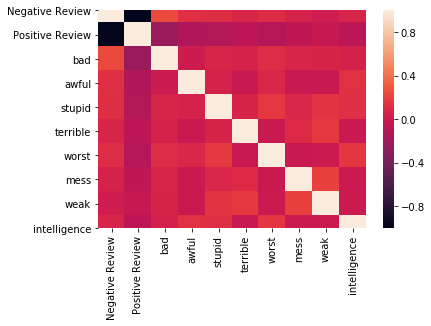

In [136]:
sns.heatmap(df1.corr())

In [137]:
#Classifier 2 (identifies negative reviews). A variation of choice keywords
df2 = df.copy()

neg_keywords2 = ['bad', 'awful','stupid', 'lame', 'worse', 'offensive', 'weak', 'pretentious', 'dry', 'cheap']

for key in neg_keywords2:
    df2[str(key)] = df2.Message.str.contains(
        ' ' + str(key),
        case=False
    )

data2 = df2[neg_keywords2]

#Bernoulli for boolean data
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data2, target_neg)

# Classify, storing the result in a new variable.
y_pred2 = bnb.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target_neg != y_pred2).sum()
))

Number of mislabeled points out of a total 748 points : 281


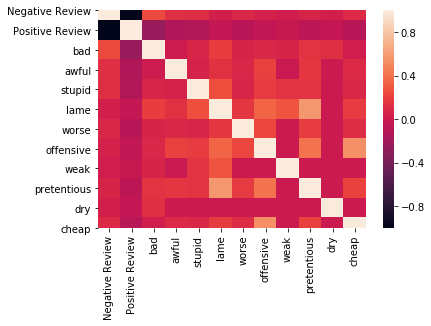

In [138]:
sns.heatmap(df2.corr())

In [139]:
confusion_matrix(target_neg, y_pred2)

array([[380,   6],
       [275,  87]], dtype=int64)

There is barely any difference. 275 of the total 362 negative reviews were predicted to be postive (type II errors). Only 6 of the total 386 positive reviews were marked as negative (type I error). We again use cross validation with 10 folds. There is still a lot of variation in the scores

In [141]:
cross_val_score(bnb, data2, target_neg, cv=10)

array([0.59210526, 0.59210526, 0.61333333, 0.69333333, 0.66666667,
       0.64      , 0.62162162, 0.60810811, 0.52702703, 0.64864865])

We do one last negative review classifier. This time we combine all of the keywords used so far.

In [142]:
#Classifier 3 (identifies negative reviews). Combined negative keywords
df3 = df.copy()

neg_keywords3 = ['bad', 'awful','stupid', 'terrible', 'lame', 'worse', 'worst',
                 'mess', 'offensive', 'weak', 'pretentious', 'dry', 'cheap', 'intelligence']

for key in neg_keywords3:
    df3[str(key)] = df3.Message.str.contains(
        ' ' + str(key),
        case=False
    )

data3 = df3[neg_keywords3]

#Bernoulli for boolean data
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data3, target_neg)

# Classify, storing the result in a new variable.
y_pred3 = bnb.predict(data3)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target_neg != y_pred3).sum()
))

Number of mislabeled points out of a total 748 points : 267


In [144]:
confusion_matrix(target_neg, y_pred3)

array([[378,   8],
       [259, 103]], dtype=int64)

In [145]:
cross_val_score(bnb, data3, target_neg, cv=10)

array([0.57894737, 0.60526316, 0.61333333, 0.69333333, 0.68      ,
       0.65333333, 0.64864865, 0.62162162, 0.58108108, 0.67567568])

This caught only 16 more negative reviews than the previous classifier. Let's identify positive reviews instead.

In [146]:
#Classifier 4 (identifies positive reviews). Combined negative keywords
df4 = df.copy()

pos_keywords1 = ['good', 'interesting', 'awesome', 'art', 'great', 'well', 'funny']

for key in pos_keywords1:
    df4[str(key)] = df4.Message.str.contains(
        ' ' + str(key),
        case=False
    )

data4 = df4[pos_keywords1]
target_pos = df['Positive Review']

#Bernoulli for boolean data
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data4, target_pos)

# Classify, storing the result in a new variable.
y_pred4 = bnb.predict(data4)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target_pos != y_pred4).sum()
))

Number of mislabeled points out of a total 748 points : 312


In [147]:
confusion_matrix(target_pos, y_pred4)

array([[336,  26],
       [286, 100]], dtype=int64)

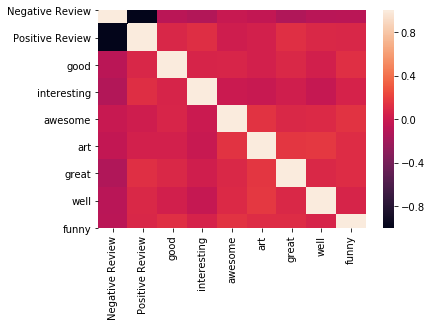

In [148]:
sns.heatmap(df4.corr())

In [149]:
cross_val_score(bnb, data4, target_pos, cv=10)

array([0.55263158, 0.59210526, 0.64      , 0.57333333, 0.64      ,
       0.54666667, 0.59459459, 0.54054054, 0.56756757, 0.55405405])

In [154]:
#Classifier 5 (identifies positive reviews). More positive keywords
df5 = df.copy()

pos_keywords2 = ['good', 'interesting', 'awesome', 'art', 'great', 'well', 'funny', 'excellent', 'clever', 'like', 'wonderful'
                 'brilliant', 'recommended', 'nice', 'wonderful', 'charming', 'strong', 'entertained', 'creative', 'best']

for key in pos_keywords2:
    df5[str(key)] = df5.Message.str.contains(
        ' ' + str(key),
        case=False
    )

data5 = df5[pos_keywords2]

#Bernoulli for boolean data
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data5, target_pos)

# Classify, storing the result in a new variable.
y_pred5 = bnb.predict(data5)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data5.shape[0],
    (target_pos != y_pred5).sum()
))

Number of mislabeled points out of a total 748 points : 263


In [155]:
confusion_matrix(target_pos, y_pred5)

array([[319,  43],
       [220, 166]], dtype=int64)

In [156]:
cross_val_score(bnb, data5, target_pos, cv=10)

array([0.61842105, 0.61842105, 0.76      , 0.58666667, 0.66666667,
       0.62666667, 0.66216216, 0.58108108, 0.62162162, 0.58108108])

The fifth classifier has the worst cross validation score variation. Overfitting is and issue, and adding more and more words to the keyword list is definitely not a good solution. There are also far more type I errors this time.

The first four classifiers are somewhat equal in terms of cross-validation scores. Both of the positive keyword models have more type I errors. Perhaps negative reviews are more likely to contain phrases like "not good" than a positive review containg "not bad." Negative reviews are easier to identify because of this. The most important feature of those used above seems to be the boolean column indicating the presence of the word "bad."

Combining the positive and negative classifiers in some way would maybe make a better classifier. All of the classifiers above have abudant type II errors (misses). For example, first test if the review is negative using one of the negative classifiers; if it's not, use one of the positive classifiers to test if it's positive.